In [7]:
import cv2
from matplotlib import pyplot as plt
import easyocr
import imutils
import numpy as np


1.Read in image ,grayscale and blur

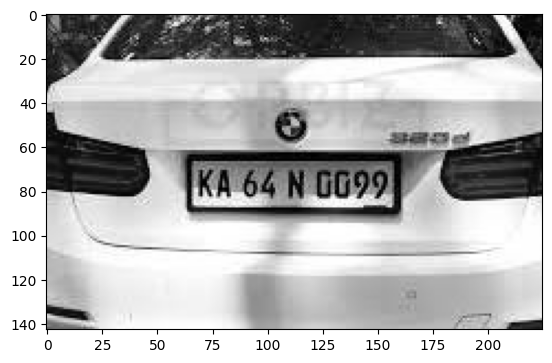

In [20]:
img=cv2.imread('number_plate1.jpeg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

2.Apply filter and find edges for localization

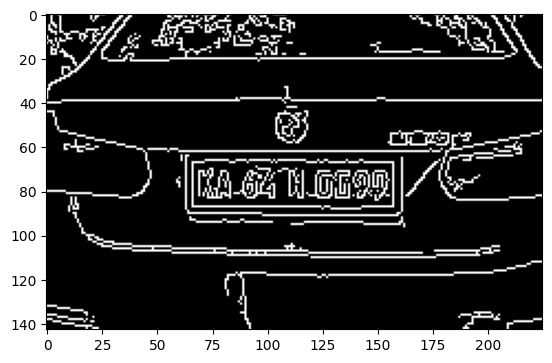

In [21]:
bfilter=cv2.bilateralFilter(gray,11,17,17)#noise reduction
edged=cv2.Canny(bfilter,30,200)#Edge detection 
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

3.Find Cotour and apply mask


In [22]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [23]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if(len(approx)==4):
        location=approx
        break

In [24]:
location

array([[[ 66,  67]],

       [[ 66,  87]],

       [[157,  87]],

       [[157,  67]]], dtype=int32)

In [25]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

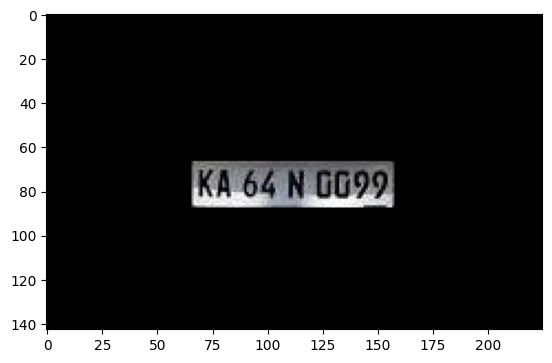

In [26]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [28]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

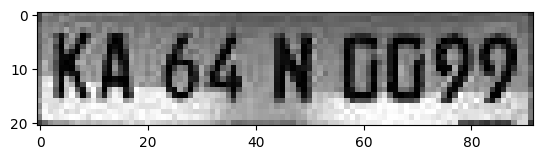

In [31]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

4.use easy ocr to read text     

In [33]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


AttributeError: module 'PIL.Image' has no attribute 'Resampling'